The overall aim of this notebook is to know how to Manipulate data in a data frame using Pandas, gain familiarity with Peak Proportions, distributions including histograms and the summary statistics. This notebook explain the travel pattern and depicts usage of some sort of coding.

 ### Introducting the data set
 - importing pandas library
 - Loading data from a CSV file
     
 1. Section 1: Calculating Morning and Evening Peak Proportions
     1. Creating a data frame for 'AMPeak' and'PMPeak'
     1. Total exits of each station
     1. Morning and Evening Peak Proportions
     1. Description of new data frame
       
 2. Section 2: Plotting and Analysing Distributions
     1. Generate statistics of the distributions
     1. Plotting histogram of two Proportions
     1. Comments on travel pattern.
      
 3. Section 3: A Simple Classification of Stations
     1. Usage of thresholds and classification of stations
     1. Northern Line stations classification


##  Introducing the Data Set

This notebook look at exits from the London underground stations. The data was generated by Transport for London and relates to a week day. 

The pattern of travel on the underground station is not balanced. Every day people enter the underground in the morning near where they live and exit it near their place of work (or study). The pattern is (approximately) reversed in the evening.

###  Import the pandas library

Since pandas is a very large library, it is probably not a good idea to import the library without a prefix. We use Python's 'import as' so that we can have a short name as a prefix. It is common to use the `pd` prefix.

In [ ]:
import pandas as pd

###  Loading data from a CSV file
The CSV file can be loaded from the PC you are using. Check you have downloaded it: the code assumes it is in the same directory as the notebook. The results is a **data frame**.

The variable `df` below holds the dataframe. Writing `df` on a line on its own causes a summary of the dataframe to be printed. Fortunatley, the system knows not to print too many lines.

In [ ]:
# Loading data frame by use of pandas
import pandas as pd
df = pd.read_csv('hourlyExits.csv',index_col = 'Station')
df

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,4,38,173,192,132,83,73,99,129,123,...,283,364,467,333,183,146,139,108,53,10
Wood Green,17,154,450,831,884,557,528,604,705,802,...,1554,2334,2606,1802,1123,862,799,773,497,78
Wood Lane,13,138,441,594,763,396,322,338,342,304,...,455,665,646,354,187,117,101,71,28,4


## Section 1: Calculating Morning and Evening Peak Proportions

The distribution of exit times is bi-modal, with a morning and evening peak. It is common to divide the operation of the underground into 6 periods.

  Period Hours Included 
- Early H05, H06
 -AMPeak H07, H08, H09
 -Interpeak H10, H11, H12, H13, H14, H15
- PMPeak H16, H17, H18
- Evening H19, H20, H21
- Late H22, H23, H00, H01

We will focus on only the morning and evening peaks (i.e. periods AMPeak and PMPeak)

### Section 1.1: Creating a data frame for 'AMPeak' and'PMPeak'

Create a data frame (called something like 'peak_counts') with station as the index 
and two columns, one for the AM peak count and one for the PM peak count

In [ ]:
# Code below add two columns AMPEAK and PMPEAK using assign function
peak_counts =  pd.DataFrame().assign( AMPEAK = df.H07 + df.H08 + df.H09, 
                                     PMPEAK = df.H16 + df.H17 + df.H18) 
peak_counts

,AMPEAK,PMPEAK
Station,,
Acton Town,1970,2628
Aldgate,7408,2992
Aldgate East,7618,3803
Alperton,856,1847
Amersham,424,1465
...,...,...
Wimbledon Park,497,1114
Wood Green,2165,6494
Wood Lane,1798,1766


### Section 1.2: Total exits of each station

In this section we look at the distribution of the total number of exists for each station from data frame df and add a column using assign function.

In [ ]:
# Code below add column for Totalexits
totalexits = peak_counts.assign(Totalexits = df.apply(sum,axis=1))
totalexits

,AMPEAK,PMPEAK,Totalexits
Station,,,
Acton Town,1970,2628,9362
Aldgate,7408,2992,16136
Aldgate East,7618,3803,21206
Alperton,856,1847,5118
Amersham,424,1465,3905
...,...,...,...
Wimbledon Park,497,1114,3296
Wood Green,2165,6494,18989
Wood Lane,1798,1766,6610


### Section 1.3: Morning and Evening Peak Proportions

We will add a new column AM PeakProportion and PM PeakProportion to the above mentioned total exit dataframe. Earlier we added a column using assign function but in this section we are using different code. The steps are:

- Divide AMPeak counts by Totalexits counts and add a column for AM PeakProportion
- Divide PMPeak counts by Totalexits counts and add a column for PM PeakProportion

In [ ]:
# Code below add two more columns for AM peakproportion and PM peakproportion
totalexits['AM PeakProportion'] = totalexits['AMPEAK'] / totalexits['Totalexits']
totalexits['PM PeakProportion'] = totalexits['PMPEAK'] / totalexits['Totalexits']
totalexits

,AMPEAK,PMPEAK,Totalexits,AM PeakProportion,PM PeakProportion
Station,,,,,
Acton Town,1970,2628,9362,0.210425,0.280709
Aldgate,7408,2992,16136,0.459098,0.185424
Aldgate East,7618,3803,21206,0.359238,0.179336
Alperton,856,1847,5118,0.167253,0.360883
Amersham,424,1465,3905,0.108579,0.375160
...,...,...,...,...,...
Wimbledon Park,497,1114,3296,0.150789,0.337985
Wood Green,2165,6494,18989,0.114013,0.341987
Wood Lane,1798,1766,6610,0.272012,0.267171


### Section 1.4: Clear description of new data frame (totalexits)

In new data frame, there are total 268 rows and 5 columns.

Index is `Station` and columns are `AM peak`, `PM peak`, `Totalexits`, `AM PeakProportion` and `PM PeakProportion`.

- Total 268 different stations are placed in index `station`.
- `AM peak` column is the total exit counts of ( H07, H08, H09 ).
- `PM peak` is the total exit counts of ( H16, H17, H18 ).
- `AM peak proportion` is the proportion of AM peak / daily total for the station.
- `PM peak proportion` is the proportion of PM peak / daily total for the station.
- `Totalexits` column is the total exit counts for all hours ( Each station ).



## Section 2: Plotting and Analysing Distributions

The aim of this section is to analyse the summary information of statistics distribution (e.g. the median, quartiles and range) , shape of each distribution, plotting of histogram and pattern of travel.This section will delve into deep study of AM peak proportion and PM peak proportions graphs and helping to understand the travel pattern.

### Section 2.1 Generate statistics of the distributions

In this part, we use .describe() which is used for calculating some statistical data like total counts, mean, min, max, std and percentile of the numerical values of the Series or column.

In [ ]:
# Code below helps in generating statistics distribution of the numerical data
totalexits.describe()

,AMPEAK,PMPEAK,Totalexits,AM PeakProportion,PM PeakProportion
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,4549.768657,4477.555970,17194.477612,0.207132,0.298750
std,8181.784059,6276.463316,23480.190142,0.122161,0.087724
min,27.000000,239.000000,596.000000,0.045302,0.084630
25%,677.500000,1471.750000,4889.500000,0.116120,0.240947
50%,1517.000000,2622.000000,9210.000000,0.169378,0.307397
75%,4315.250000,4707.750000,19999.500000,0.266443,0.361596
max,61116.000000,59486.000000,149258.000000,0.630427,0.496079


### Section 2.2 Plotting histogram of two Proportions

The `.hist` method allows us to select a subset of columns. In the code below, we have 
selected 2 'columns'.

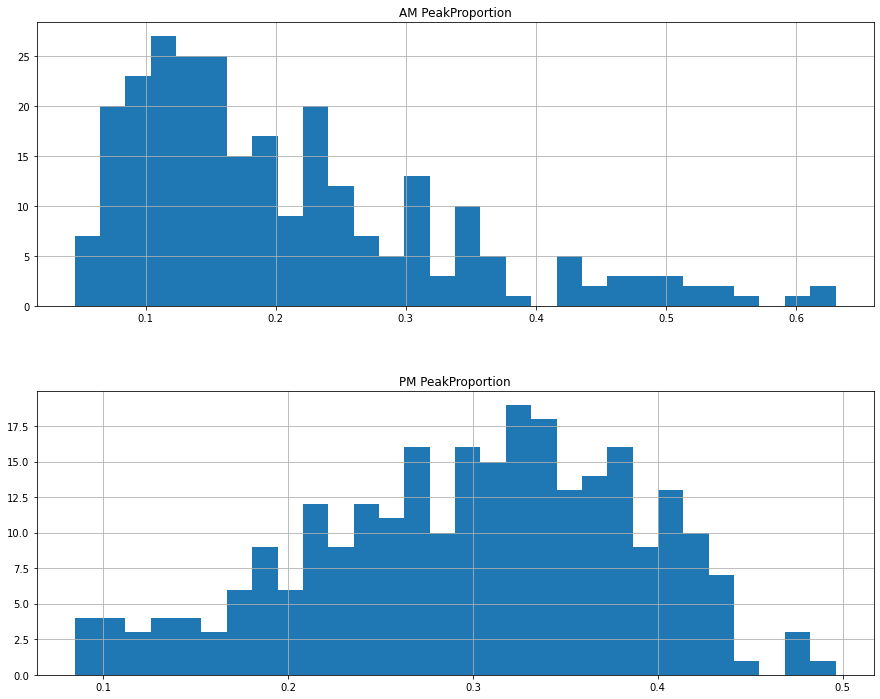

In [ ]:
# Code below is for plotting two histograms
Plotting = totalexits.hist(figsize=(15,12), column=['AM PeakProportion','PM PeakProportion'], bins=30, sharex = False, layout=(2,1))

### Section 2.3: Review and comments on travel pattern 

During AM peak, large portion of people exits from small group of stations and it seems like these stations are close to work areas. During PM peak, people exits from wide range of stations as they are returing home to variuos areas.
A small group of stations has a higher proportions of exits during AM peak than any station has during PM peak, these stations are particularly busy during the morning commute and are most likely near the most common work areas.

### Histogram

- AM_PEAK Histogram: As the mean of AM peakproportion is greater than median. The AM peak histogram is positively skewed. X axis of histogram is carrying exit proportions, while Y axis is having frequency/stations. Histogram shows that large portion of stations are having less exit proportions means relatively quite and a small portion of stations are having high exit proportions means very busy in the morning peak hours.

- PM_PEAK Histogram: Graph shows that most of the stations are busy in terms of exits during PM peak hours and fewer stations are having high proportion of exits during PM peak. Proportion of exits are spread out among stations more evenly.

### Statistics of distribution 

- Standard deviation clearly shows that distribution spread is large in AM peak hours than PM peak hours.

- Average (mean) shows us that exits proportions are greater in PM peak hours than AM peak hours.

 Mean : Average exit counts are observed more in AM peak than PM peak. However, if we see the proportions, average proportions are recorded highter in PM peak than AM peak. The average exits counts of AM peak and PM peak are 4549 Nos and 4477 Nos, whereas their proportions are 0.20 and 0.29 respectively.
 
Quantiles :

- Quantiles also shows that proportions of exits at (25, 50, 75 percentile ) is greater in PM peak hours than AM peak.

- Q1 (25 percentile) : The intital 25 percentile exits of morning and evening peaks are 677 and 1471 Nos, whereas their proportions are 0.11 and 0.24 respectively. This indicates that the proportion of Q1 (25%) of exits is more during PM peak hours as compared to AM peak hours.

- Median : The median of morning and evening peaks are 1517 Nos and 2622 Nos, whereas their proportions are 0.16 and 0.30 respectively. This indicates that the proportion of median of London underground stations exits is more during evening peak hours as compared to morning peak hours. 

- Q3 (75 percentile): The intital 75 percentile exits of morning and evening peaks are 4315 and 4707 nos, whereas their proportions are 0.26 and 0.36 respectively. This indicates that the proportion of Q3 (75%) exits is more during PM peak hours as compared to AM peak hours.

## Section 3:  A Simple Classification of Stations

The aim of this section is to classify stations into three categories :-

- Work ( ‘more’ exits in the AM peak than in the PM peak )
- Residential ( ‘more’ exits in the PM peak than in the AM peak )
- Other ( number of exits in AM and PM peaks are approximately equal )

 Also, report classification of stations on northern line.

### Section 3.1 Usage of thresholds and classification of stations

In this part, we use a function and thresholds to classify stations into required categories and after that we assign a column 'CLASSIFICATION'.

The suitable threshold limit for classification as 'Work' is approximately 1.4 for ratio of  AM_PEAK / PM_PEAK. While, the suitable threshold limit for classification as 'Residential' is approxiately 1.4 for ratio of PM_PEAK to AM_PEAK. These ratios has been decided based on the fact that workplaces are located at at city centre in London, however, residential areas are located at far-off places from city centre. By taking the ratio of 1.4, the aforesaid criteria has been met for sample of stations. Based on the above assumption, the classification of all stations in London is as below:


In [ ]:
# Created function below to classify the stations
def Category(row):
    if (row.AMPEAK > 1.4*row.PMPEAK) : return 'Work'
    if (1.4*row.AMPEAK < row.PMPEAK) : return 'Residential'
    return 'other'

# add a column name 'CLASSIFICATION' by using assign.
Classification = peak_counts.assign(CLASSIFICATION = peak_counts.apply(Category, axis=1))
Classification

,AMPEAK,PMPEAK,CLASSIFICATION
Station,,,
Acton Town,1970,2628,other
Aldgate,7408,2992,Work
Aldgate East,7618,3803,Work
Alperton,856,1847,Residential
Amersham,424,1465,Residential
...,...,...,...
Wimbledon Park,497,1114,Residential
Wood Green,2165,6494,Residential
Wood Lane,1798,1766,other


### Section 3.2 Northern line stations classification

This part shows the classification of stations on the northern line.

- Residential Stations (7 no's) :-  Archway, Balham, Highgate, High Barnet, Leicester Square, Morden, South Wimbledon

- Work Stations (3 no's) :- Goodge Street, Tottenham Court Road, Warren Street

-  Other Station (1 no's) :- Embankment


In [ ]:
# Below code helps in filtering the selected stations from above data frame.
Northern_line = Classification.loc[(Classification.index.isin(['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet', 'Leicester Square', 
'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']))]
Northern_line

,AMPEAK,PMPEAK,CLASSIFICATION
Station,,,
Archway,2190,4106,Residential
Balham,2637,7635,Residential
Embankment,10692,8829,other
Goodge Street,5374,1949,Work
High Barnet,987,2362,Residential
Highgate,893,3170,Residential
Leicester Square,8952,12915,Residential
Morden,1550,5955,Residential
South Wimbledon,1335,2198,Residential


### Classification of stations on northern line


- Residential stations on northern line are `Archway, Balham, Highgate, High Barnet, Leicester Square, Morden, South Wimbledon` as they are evaluated more exits during PM peak than in the AM peak.

- Work Stations on northern line are Goodge Street, Tottenham Court Road, Warren Street` as they are evaluated more exits during AM peak than in the PM peak.


As per the London underground map, the stations on northern lines viz; Warren Street, Tottenham Cort Road and Goodge Stret are located on city centre, which are the workplaces in central London. Whereas, Morden, Balham, Highgate etc are far from city centre and considered as residential areas.

